In [72]:
from capstone_data_eng import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

import seaborn as sns

pd.options.display.max_columns = None

In [2]:
out,profile_all,portfolio,offers_all,transactions_all,transactions_during_offer,transactions_outside_offer=load_data_cv(person_split=None,rename_offers=True,time_split_min=None,time_split_max=None,
                                                                 add_transactions=False,skip_overlap=False,skip_add_purchases=False,calc_net_offer_time=True,assign_to='ignore',location='local')

/home/marco/UD/Starbucks_capstone/capstone_data_eng.py:733: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  profile_all = load_profile(location=location)


offer received     76277
offer viewed       57725
offer completed    33579
Name: event, dtype: int64
er,ec,ev
(76277, 3) (33579, 4) (57725, 3)
er  (76277, 6)
persons with no offers received in timeframe:  6
transactions_during_offer.shape: (122652, 7)
(76277, 27)
add_stats_by_person:
(76277, 38)
(76277, 43)
(76277, 49)
(76277, 50)
(76277, 58)


In [23]:
display(out.head())

,person,offer,offer_received,offer_viewed,offer_completed,reward,offer_end,difficulty,duration,offer_type,web,email,mobile,social,offer_reward,duration_hours,duration_viewed,duration_effective,viewed,rewarded,received,comp_not_viewed,completed,Tpay_offer,Npay_offer,Maxpay_offer,Minpay_offer,Netpay_offer,Avg_pay_offer,age,became_member_on,gender,income,joined_year,joined_month,joined_week,gender_num,user_time,Tpay_out,Npay_out,p_c_r_ratio,p_cnv_r_ratio,overlaps,Tpay_offers_tot,Npay_offers_tot,Maxpay_offers_tot,Minpay_offers_tot,Trewards_tot,Nrewards_tot,tot_gross_offer_time,tot_net_offers_time,tot_not_offers_time,Avg_pay_offers,Net_pay_offers,Avg_net_pay_offers,Avg_pay_outside,Avg_D_O,Avg_D_OS
0,78afa995795e4d85b5d9ceeca43f5fef,g,0,6.0,132.0,5.0,168.0,5,7,bogo,True,True,True,False,5,168.0,162.0,162.0,True,True,True,False,True,37.67,2.0,19.89,17.78,32.67,0.232531,75,2017-05-09,F,100000.0,2017,5,19,0,443,0.00,0.0,0.750000,0.0,0.0,135.34,6.0,29.72,17.78,20.0,3,396.0,400.0,344.0,0.338350,115.34,0.288350,0.000000,0.232531,0.338350
1,ebe7ef46ea6f4963a7dd49f501b26779,g,0,-1.0,-1.0,0.0,168.0,5,7,bogo,True,True,True,False,5,168.0,0.0,0.0,False,False,True,False,False,0.00,0.0,0.00,0.00,0.00,0.000000,59,2015-01-21,M,41000.0,2015,1,4,1,1282,52.08,13.0,0.333333,0.0,0.0,49.17,14.0,11.50,0.69,4.0,2,390.0,297.0,447.0,0.165556,45.17,0.152088,0.116510,-0.116510,0.049045
2,f082d80f0aac47a99173ba8ef8fc1909,g,0,48.0,12.0,5.0,168.0,5,7,bogo,True,True,True,False,5,168.0,120.0,120.0,True,True,True,False,True,14.64,4.0,11.13,0.28,9.64,0.122000,40,2016-07-09,M,33000.0,2016,7,27,1,747,40.94,14.0,0.166667,0.0,0.0,24.86,12.0,11.13,0.18,5.0,1,402.0,327.0,417.0,0.076024,19.86,0.060734,0.098177,0.023823,-0.022153
3,c0d210398dee4a0895b24444a5fcd1d2,g,0,30.0,66.0,5.0,168.0,5,7,bogo,True,True,True,False,5,168.0,138.0,138.0,True,True,True,False,True,6.01,1.0,6.01,6.01,1.01,0.043551,45,2018-07-07,M,33000.0,2018,7,27,1,19,0.00,0.0,0.600000,0.0,0.0,54.05,10.0,9.28,3.33,18.0,3,570.0,482.0,262.0,0.112137,36.05,0.074793,0.000000,0.043551,0.112137
4,57dd18ec5ddc46828afb81ec5977bef2,g,0,-1.0,-1.0,0.0,168.0,5,7,bogo,True,True,True,False,5,168.0,0.0,0.0,False,False,True,False,False,0.00,0.0,0.00,0.00,0.00,0.000000,54,2017-02-07,F,80000.0,2017,2,6,0,534,0.00,0.0,0.500000,0.0,0.0,219.54,9.0,39.79,11.66,17.0,3,492.0,381.0,363.0,0.576220,202.54,0.531601,0.000000,0.000000,0.576220


In [4]:
display(out.columns)

Index(['person', 'offer', 'offer_received', 'offer_viewed', 'offer_completed',
       'reward', 'offer_end', 'difficulty', 'duration', 'offer_type', 'web',
       'email', 'mobile', 'social', 'offer_reward', 'duration_hours',
       'duration_viewed', 'duration_effective', 'viewed', 'rewarded',
       'received', 'comp_not_viewed', 'completed', 'Tpay_offer', 'Npay_offer',
       'Maxpay_offer', 'Minpay_offer', 'Netpay_offer', 'Avg_pay_offer', 'age',
       'became_member_on', 'gender', 'income', 'joined_year', 'joined_month',
       'joined_week', 'gender_num', 'user_time', 'Tpay_out', 'Npay_out',
       'p_c_r_ratio', 'p_cnv_r_ratio', 'overlaps', 'Tpay_offers_tot',
       'Npay_offers_tot', 'Maxpay_offers_tot', 'Minpay_offers_tot',
       'Trewards_tot', 'Nrewards_tot', 'tot_gross_offer_time',
       'tot_net_offers_time', 'tot_not_offers_time', 'Avg_pay_offers',
       'Net_pay_offers', 'Avg_net_pay_offers', 'Avg_pay_outside', 'Avg_D_O',
       'Avg_D_OS'],
      dtype='object')

In [5]:
c_bin=['web','email', 'mobile', 'social','viewed', 'rewarded', 'received', 'comp_not_viewed', 'completed',]
c_num_time=['offer_received', 'offer_viewed', 'offer_completed', 'offer_end',]
c_num_offer=['reward','offer_reward', 'duration_hours','duration_viewed','duration_effective', 'overlaps','difficulty', 'duration'  ]
c_num_leak_offer=['Tpay_offer', 'Npay_offer', 'Maxpay_offer', 'Minpay_offer', 'Netpay_offer', 'Avg_pay_offer']
c_num_person=['age', 'income', 'Tpay_out', 'Npay_out', 'user_time' ]
c_num_person_ignore=['became_member_on',   'joined_year', 'joined_month','joined_week', 'gender_num']

c_cat_offer=[ 'offer_type' ]
c_cat_person=['gender',]
c_drop_order=['person','offer']

c_num_offers=['p_c_r_ratio', 'p_cnv_r_ratio','Tpay_offers_tot',
       'Npay_offers_tot', 'Maxpay_offers_tot', 'Minpay_offers_tot',
       'Trewards_tot', 'Nrewards_tot', 'tot_gross_offer_time',
       'tot_net_offers_time', 'tot_not_offers_time', 'Avg_pay_offers',
       'Net_pay_offers', 'Avg_net_pay_offers', 'Avg_pay_outside', 'Avg_D_O',
       'Avg_D_OS']




In [6]:
c_total=c_bin+c_num_time+c_num_offer+c_num_leak_offer+c_num_person+c_num_person_ignore + \
    c_cat_offer+c_cat_person+c_num_offers+ c_drop_order

In [7]:
display(set(out.columns)-set(c_total))

set()

In [10]:
out[c_num_time]=out[c_num_time].fillna(-1)


In [11]:
print("columns with nan:")
list(out.columns[out.isna().any()])


['gender', 'income']

In [22]:
most_common_gender=profile_all['gender'].value_counts(sort=True).index[0]
income_median=profile_all['income'].median()

out.loc[out.gender.isna(),'gender']=most_common_gender
out.loc[out.income.isna(),'income']=income_median

print("columns with nan:")
list(out.columns[out.isna().any()])

columns with nan:


[]

In [30]:
out_num=out[c_num_time+c_num_person+c_num_offer+c_num_leak_offer+c_num_offers].copy()
out_num['income']=np.log10(out_num['income']+.1)

print('out_num shape:', out_num.shape)

In [29]:
out_num.head()

,offer_received,offer_viewed,offer_completed,offer_end,age,income,Tpay_out,Npay_out,user_time,reward,offer_reward,duration_hours,duration_viewed,duration_effective,overlaps,difficulty,duration,Tpay_offer,Npay_offer,Maxpay_offer,Minpay_offer,Netpay_offer,Avg_pay_offer,p_c_r_ratio,p_cnv_r_ratio,Tpay_offers_tot,Npay_offers_tot,Maxpay_offers_tot,Minpay_offers_tot,Trewards_tot,Nrewards_tot,tot_gross_offer_time,tot_net_offers_time,tot_not_offers_time,Avg_pay_offers,Net_pay_offers,Avg_net_pay_offers,Avg_pay_outside,Avg_D_O,Avg_D_OS
0,0,6.0,132.0,168.0,75,5.000000,0.00,0.0,443,5.0,5,168.0,162.0,162.0,0.0,5,7,37.67,2.0,19.89,17.78,32.67,0.232531,0.750000,0.0,135.34,6.0,29.72,17.78,20.0,3,396.0,400.0,344.0,0.338350,115.34,0.288350,0.000000,0.232531,0.338350
1,0,-1.0,-1.0,168.0,59,4.612785,52.08,13.0,1282,0.0,5,168.0,0.0,0.0,0.0,5,7,0.00,0.0,0.00,0.00,0.00,0.000000,0.333333,0.0,49.17,14.0,11.50,0.69,4.0,2,390.0,297.0,447.0,0.165556,45.17,0.152088,0.116510,-0.116510,0.049045
2,0,48.0,12.0,168.0,40,4.518515,40.94,14.0,747,5.0,5,168.0,120.0,120.0,0.0,5,7,14.64,4.0,11.13,0.28,9.64,0.122000,0.166667,0.0,24.86,12.0,11.13,0.18,5.0,1,402.0,327.0,417.0,0.076024,19.86,0.060734,0.098177,0.023823,-0.022153
3,0,30.0,66.0,168.0,45,4.518515,0.00,0.0,19,5.0,5,168.0,138.0,138.0,0.0,5,7,6.01,1.0,6.01,6.01,1.01,0.043551,0.600000,0.0,54.05,10.0,9.28,3.33,18.0,3,570.0,482.0,262.0,0.112137,36.05,0.074793,0.000000,0.043551,0.112137
4,0,-1.0,-1.0,168.0,54,4.903091,0.00,0.0,534,0.0,5,168.0,0.0,0.0,0.0,5,7,0.00,0.0,0.00,0.00,0.00,0.000000,0.500000,0.0,219.54,9.0,39.79,11.66,17.0,3,492.0,381.0,363.0,0.576220,202.54,0.531601,0.000000,0.000000,0.576220


In [50]:
scaler = MinMaxScaler()
out_num_s=scaler.fit_transform(out_num)
out_num_s=pd.DataFrame(out_num_s,columns=out_num.columns)


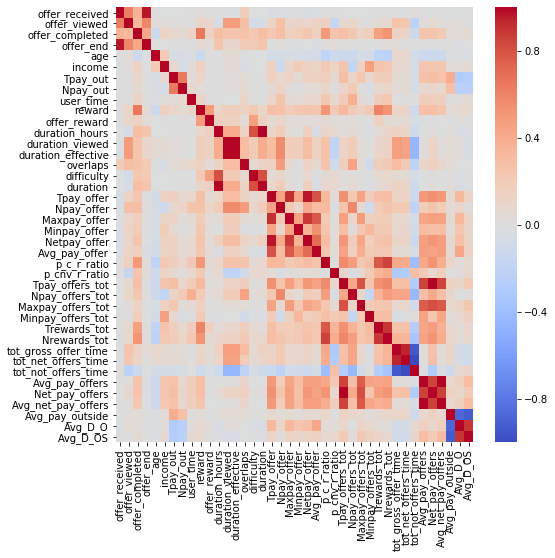

In [46]:
corr = out_num_s.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='coolwarm');

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=35)
pca.fit(out_num_s)
print(pca.explained_variance_ratio_)  

[2.63279478e-01 1.48004833e-01 1.40373062e-01 1.15948387e-01
 7.63169973e-02 4.98866154e-02 4.55659326e-02 3.24755541e-02
 2.88030798e-02 1.98961671e-02 1.38435565e-02 1.27632517e-02
 1.04656899e-02 9.98045860e-03 7.67649741e-03 6.60893222e-03
 6.13624862e-03 2.88517585e-03 2.42733558e-03 1.91610319e-03
 1.29750237e-03 1.14752961e-03 8.97800882e-04 5.66299884e-04
 4.22867230e-04 1.43749949e-04 1.06543626e-04 6.94628162e-05
 4.61724812e-05 2.22316869e-05 1.69738787e-05 8.98342932e-06
 3.62725952e-07 1.62728870e-07 3.65724879e-31]


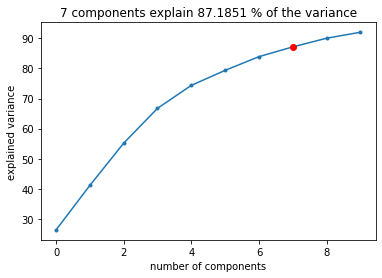

In [68]:
expl_var=100.*np.cumsum(pca.explained_variance_ratio_)
N_pca_comp=7

plt.plot( expl_var ,'.-' );
plt.plot( N_pca_comp,expl_var[N_pca_comp],'ro');

plt.title('%d components explain %g %% of the variance' % (N_pca_comp,expl_var[N_pca_comp]))

plt.xlabel('number of components')
plt.ylabel('explained variance');

In [73]:
pca = PCA(n_components=N_pca_comp, svd_solver='full')
out_num_pca=pca.fit_transform(out_num_s)

pca_comp=pd.DataFrame(pca.components_,columns=out_num_s.columns)
display(pca_comp.T.iloc[:,0].sort_values(ascending=False).head(10))

offer_completed       0.356023
duration_effective    0.326986
duration_viewed       0.326986
duration              0.287196
duration_hours        0.287196
p_c_r_ratio           0.279566
reward                0.269336
offer_viewed          0.235770
Nrewards_tot          0.235538
difficulty            0.216341
Name: 0, dtype: float64

In [70]:
display(pca_comp.T.iloc[:,1].sort_values(ascending=False).head(10))

duration_hours         0.437023
duration               0.437023
difficulty             0.352684
duration_effective     0.119859
duration_viewed        0.119859
offer_reward           0.114617
age                    0.062712
tot_not_offers_time    0.031374
Avg_D_O               -0.000743
Avg_pay_outside       -0.000757
Name: 1, dtype: float64

In [71]:
display(pca_comp.T.iloc[:,3].sort_values(ascending=False).head(10))

offer_completed        0.261368
reward                 0.256607
tot_not_offers_time    0.250187
difficulty             0.250049
offer_reward           0.231361
offer_received         0.194307
offer_end              0.184210
duration_hours         0.149591
duration               0.149591
p_cnv_r_ratio          0.138010
Name: 3, dtype: float64

In [ ]:
out_tnse = TSNE(n_components=2).fit_transform(out_num_pca)


In [ ]:
out_num['tnse1']=out_tnse[:,0]
out_num['tnse2']=out_tnse[:,1]


In [ ]:
sns.scatterplot(     x="tsne2d_1", y="tsne2d_2",
    hue="comp_not_viewed",
    #palette=sns.color_palette("hls", 10),
    data=out_num,
    legend="full",
    alpha=0.3
)